In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000137_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000010_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000067_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000060_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000210_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000240_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000117_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000130_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000005_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000073_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/00000023_resized.jpg
/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/0

In [104]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

In [105]:

#Todo, fiddle with this.
augmented = ImageDataGenerator(
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0,
    #horizontal_flip=True,
    #zoom_range=0.225,
    rescale=1/255,
    validation_split=0.5)
"""

augmented=ImageDataGenerator(horizontal_flip=True,  
                       rotation_range=20, 
                       width_shift_range=.2,
                       height_shift_range=.2, 
                       zoom_range=.2)"""

'\n\naugmented=ImageDataGenerator(horizontal_flip=True,  \n                       rotation_range=20, \n                       width_shift_range=.2,\n                       height_shift_range=.2, \n                       zoom_range=.2)'

In [106]:
#train data 
train = augmented.flow_from_directory(
    "/kaggle/input/chess-pieces-detection-images-dataset/",
    target_size=(128,128),#check here
    subset="training",
    batch_size=32,
    class_mode='categorical',
    #shuffle=True
)
class_count_test = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in train.classes:
    class_count_test[i] += 1
print(class_count_test)#count of each classes value
"""
labels = []
images = []

for image,label in train:
    labels.extend(label)
    images.extend(image)
    


train_df = pd.DataFrame({'image': images, 'label': labels})
print(train_df.head)
"""

Found 327 images belonging to 5 classes.
{0: 58, 1: 70, 2: 71, 3: 87, 4: 41}


"\nlabels = []\nimages = []\n\nfor image,label in train:\n    labels.extend(label)\n    images.extend(image)\n    \n\n\ntrain_df = pd.DataFrame({'image': images, 'label': labels})\nprint(train_df.head)\n"

In [107]:
#train data 
val = augmented.flow_from_directory(
    "/kaggle/input/chess-pieces-detection-images-dataset/",
    target_size=(128,128),#check here
    subset="validation",
    batch_size=32,
    class_mode='categorical',
    #shuffle=True
)
class_count_val = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in val.classes:
    class_count_val[i] += 1
print(class_count_val)#count of each classes value
"""
labels = []
images = []

for image,label in val:
    labels.extend(label)
    images.extend(image)

val_df = pd.DataFrame({'image': images, 'label': labels})
print(val_df.head)"""

Found 324 images belonging to 5 classes.
{0: 57, 1: 69, 2: 70, 3: 87, 4: 41}


"\nlabels = []\nimages = []\n\nfor image,label in val:\n    labels.extend(label)\n    images.extend(image)\n\nval_df = pd.DataFrame({'image': images, 'label': labels})\nprint(val_df.head)"

In [108]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
#from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
"""
model = models.Sequential()
#model.add(data_augmentation)
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
#model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2), strides=2))
#model.add(layers.Dropout(0.2))
#model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
"""
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    #BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(0.2),
    
    Conv2D(64, (3, 3)),
    #BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3)),
    #BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
"""
model = models.Sequential()
#data augmentation has occured previously. Relatively random.
model.add(layers.Conv2D(32, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation='relu', input_shape=(128, 128, 3)))#consider grtting rid of color
model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2), strides=2))

#convolutuon 2
model.add(layers.Conv2D(64, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation='relu', input_shape=(128, 128, 3)))#consider grtting rid of color
model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2), strides=2))

#convolutuon 3
model.add(layers.Conv2D(128, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation='relu', input_shape=(128, 128, 3)))#consider grtting rid of color
model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.03), activation='relu')),
model.add(layers.BatchNormalization()),
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.03), activation='relu')),
model.add(layers.BatchNormalization()),
model.add(layers.Dense(5, activation='softmax'))
"""



'\nmodel = models.Sequential()\n#data augmentation has occured previously. Relatively random.\nmodel.add(layers.Conv2D(32, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation=\'relu\', input_shape=(128, 128, 3)))#consider grtting rid of color\nmodel.add(layers.BatchNormalization()),\nmodel.add(layers.MaxPooling2D((2, 2), strides=2))\n\n#convolutuon 2\nmodel.add(layers.Conv2D(64, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation=\'relu\', input_shape=(128, 128, 3)))#consider grtting rid of color\nmodel.add(layers.BatchNormalization()),\nmodel.add(layers.MaxPooling2D((2, 2), strides=2))\n\n#convolutuon 3\nmodel.add(layers.Conv2D(128, (3, 3),padding="same", kernel_regularizer=regularizers.l2(0.03), activation=\'relu\', input_shape=(128, 128, 3)))#consider grtting rid of color\nmodel.add(layers.BatchNormalization()),\nmodel.add(layers.MaxPooling2D((2, 2), strides=2))\n\nmodel.add(layers.Dropout(0.3))\nmodel.add(layers.Flatten())\nmodel.add(

In [109]:
from sklearn.utils.class_weight import compute_class_weight

classes = list(class_count_test.keys())
print(class_count_test)
y = np.concatenate([[i] * class_count_test[cls] for i, cls in enumerate(classes)])
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: weight for i, weight in enumerate(weights)}
print(class_weight_dict)

{0: 58, 1: 70, 2: 71, 3: 87, 4: 41}
{0: 1.1275862068965516, 1: 0.9342857142857143, 2: 0.9211267605633803, 3: 0.7517241379310344, 4: 1.5951219512195123}


In [110]:
from keras.callbacks import EarlyStopping 

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#callback commented out
callback = [EarlyStopping(monitor='val_loss',patience = 5 , restore_best_weights=True)]#tweak patience

history = model.fit(train, class_weight=class_weight_dict, epochs=15, 
validation_data=(val), callbacks=callback, steps_per_epoch=train.samples//32,validation_steps=val.samples//32)

#here we see the accuracy and validation accuracy over time. Please note we have a halting mechanism in place
#history = model.fit(train, class_weight=class_weight_dict, epochs=25, 
 #

Epoch 1/15
10/10 [==============================] - 7s 591ms/step - loss: 1.7637 - accuracy: 0.2169 - val_loss: 1.6050 - val_accuracy: 0.2688
Epoch 2/15
10/10 [==============================] - 5s 517ms/step - loss: 1.6032 - accuracy: 0.2688 - val_loss: 1.5985 - val_accuracy: 0.2937
Epoch 3/15
10/10 [==============================] - 5s 492ms/step - loss: 1.6181 - accuracy: 0.2780 - val_loss: 1.6011 - val_accuracy: 0.2656
Epoch 4/15
10/10 [==============================] - 5s 479ms/step - loss: 1.5861 - accuracy: 0.3153 - val_loss: 1.5927 - val_accuracy: 0.2656
Epoch 5/15
10/10 [==============================] - 5s 508ms/step - loss: 1.5667 - accuracy: 0.3085 - val_loss: 1.5706 - val_accuracy: 0.3187
Epoch 6/15
10/10 [==============================] - 5s 515ms/step - loss: 1.4968 - accuracy: 0.3695 - val_loss: 1.5760 - val_accuracy: 0.2906
Epoch 7/15
10/10 [==============================] - 5s 486ms/step - loss: 1.4485 - accuracy: 0.4237 - val_loss: 1.4936 - val_accuracy: 0.3594
Epoch 

In [119]:
print(history.history)

{'loss': [1.7636549472808838, 1.6032212972640991, 1.618112325668335, 1.586102843284607, 1.5667484998703003, 1.4968044757843018, 1.4484539031982422, 1.3993699550628662, 1.299035906791687, 1.2021081447601318, 1.0944212675094604, 0.9646440148353577, 0.9516278505325317, 0.8122395277023315, 0.7731226086616516], 'accuracy': [0.21694914996623993, 0.26875001192092896, 0.27796611189842224, 0.31525424122810364, 0.3084745705127716, 0.3694915175437927, 0.4237288236618042, 0.39322033524513245, 0.508474588394165, 0.5152542591094971, 0.5898305177688599, 0.6203389763832092, 0.6135593056678772, 0.6847457885742188, 0.694915235042572], 'val_loss': [1.6049995422363281, 1.598487138748169, 1.6011213064193726, 1.5926742553710938, 1.5705678462982178, 1.576019525527954, 1.4936151504516602, 1.4600164890289307, 1.4322788715362549, 1.4254779815673828, 1.4080932140350342, 1.5087788105010986, 1.5191757678985596, 1.5482887029647827, 1.6669082641601562], 'val_accuracy': [0.26875001192092896, 0.29374998807907104, 0.26

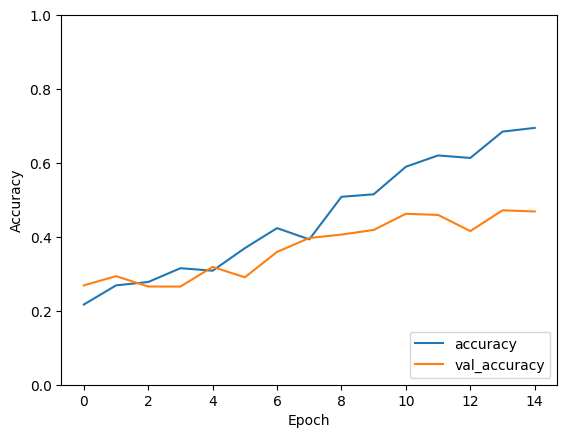

In [111]:
    

#history = model.fit(train, epochs=25, 
                  #  validation_data=(val), steps_per_epoch=train.samples//32,validation_steps=val.samples//32)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [112]:
#Here we see how we truly do for labeling each of the images, Note, augmented images are included.
from sklearn.metrics import classification_report

def report(model):
    true_labels = val.classes #true labels of each of the images ordered
    print(true_labels)
    predictions = model.predict(val)
    pred_classes = np.argmax(predictions, axis=1)
    print(pred_classes)
    report = classification_report(true_labels, 
                                   pred_classes, 
                                   target_names=val.class_indices, zero_division=1)
    print(true_labels)
    return report

In [113]:
#pretrained model 
"""
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(100,100,3),
                                                   include_top=False,
                                                   weights="imagenet")
mobilenet_model.trainable=False
mobile = Sequential()
mobile.add(mobilenet_model)
mobile.add(layers.Flatten())
mobile.add(layers.Dense(5,activation="softmax"))

history1 = mobile.fit(train,
                    epochs=50,
                    batch_size=16,
                   # steps_per_epoch=train_augmented.samples//train_augmented.batch_size,
                    callbacks=callback,
                    verbose=1,
                    validation_data=val)
                    
"""

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [114]:
print("_______________Liams Model__________________")
print(report(model))
print("_______________Mobile Net___________________")
#print(cassification-report(mobile))

_______________Liams Model__________________
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
11/11 [==============================] - 1s 107ms/step
[4 3 3 3 1 1 0 1 2 1 3 1 0 4 1 2 2 0 1 1 2 2 2 4 3 3 1 0 1 3 1 4 1 4 1 1 0
 3 4 1 4 3 3 1 3 4 1 4 1 2 1 4 4 0 0 1 4 4 3 3 1 1 4 2 1 4 2 3 3 2 1 1 0 0
 2 4 3 1 3 2 3 0 4 4 3 3 1 1 4 0 3 0 3 2 3 1 2 3 2 3 3 3 3 2 0 2 3 3 0 4 3
 2 2 3 3 1 4 3 3 